In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pmlb import fetch_data
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the dataset
X, y = fetch_data(dataset_name='529_pollen', return_X_y=True)

In [4]:
# Information about samples and features
print(f"There are {X.shape[0]} samples")
print(f"every sample has {X.shape[1]} features")
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)
mean_vals = np.mean(X, axis=0)
std_vals = np.std(X, axis=0)
variance_vals = np.var(X, axis=0)
for i in range(X.shape[1]):
    res = f'''Feature #{i+1}:
    Min value: {min_vals[i]:.3f}
    Max value: {max_vals[i]:.3f}
    mean: {mean_vals[i]:.3f}
    std: {std_vals[i]:.3f}
    variance: {variance_vals[i]:.3f}'''
    print(res)

There are 3848 samples
every sample has 4 features
Feature #1:
    Min value: -23.284
    Max value: 21.407
    mean: -0.004
    std: 6.397
    variance: 40.927
Feature #2:
    Min value: -16.393
    Max value: 17.258
    mean: 0.000
    std: 5.186
    variance: 26.891
Feature #3:
    Min value: -31.413
    Max value: 30.318
    mean: 0.003
    std: 7.874
    variance: 62.003
Feature #4:
    Min value: -34.035
    Max value: 35.803
    mean: 0.004
    std: 10.042
    variance: 100.837


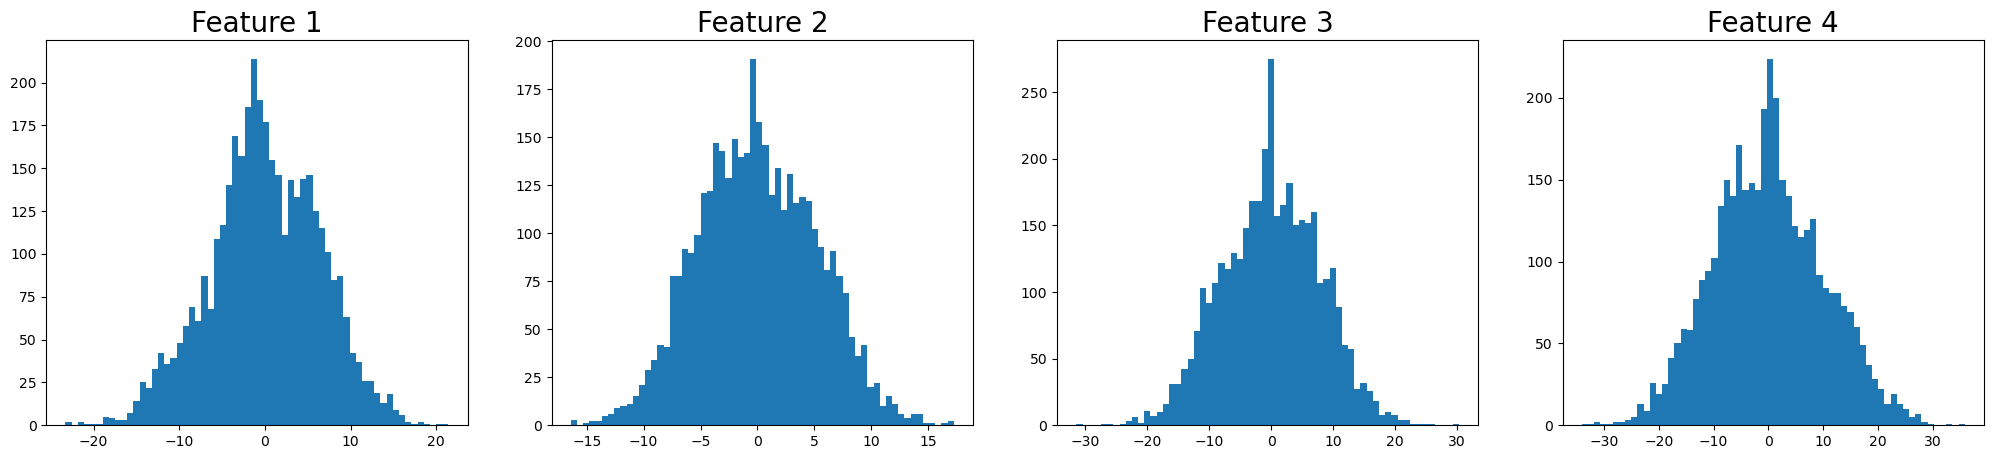

In [5]:
# Plot the distriubtion for each feature

num_features = X.shape[1]
num_bins = int(np.sqrt(X.shape[0]))
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(25, 5))
for i, ax in enumerate(axes):
    ax.hist(X[:, i], bins=num_bins)
    ax.set_title(f"Feature {i+1}", fontsize=20)
plt.show()

In [9]:
# Given a dataset, split it into train-set and test-set 10 times 
# and calculate a list of errors for each split 

ratios = np.arange(start=0.1, stop=1, step=0.1)
errors = []
for r in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=r)
    clf = LinearRegression()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

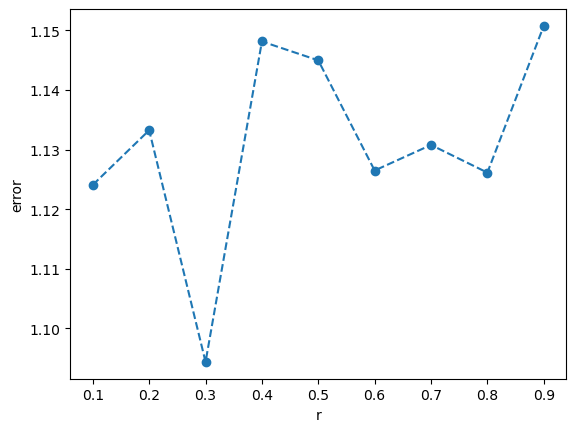

In [10]:
# Plot the errors
plt.plot(ratios, errors, '--o')
plt.xlabel('r')
plt.ylabel('error')
plt.show()

In [7]:
def naive_k_features(train_set, test_set, k):
    
    '''
    Given a train-set a test-set, and a number k, 
    returns the best k features from the dataset and the error achieved on
    the test-set
    '''
    
    feature_combinations = itertools.combinations(iterable=np.arange(4), r=k)
    best_features = None
    best_error = np.inf
    X_train_, y_train, = train_set
    X_test_, y_test = test_set        
    for combination in feature_combinations:
        X_train = X_train_[:, combination]
        X_test = X_test_[:, combination]
        clf = LinearRegression()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        error = mean_absolute_error(y_test, y_pred)
        if error < best_error:
            best_features = combination
            best_error = error
    return best_features, best_error


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_set = (X_train, y_train)
test_set = (X_test, y_test)
best_2_indices, best_error_2 = naive_k_features(train_set, test_set, 2)
best_3_indices, best_error_3 = naive_k_features(train_set, test_set, 3)
print(f"The best 2 features are: {best_2_indices}\nWith mean absolute error: {best_error_2}\n")
print(f"The best 3 features are: {best_3_indices}\nWith mean absolute error: {best_error_3}")

The best 2 features are: (0, 3)
With error: 1.447176920173288

The best 3 features are: (0, 1, 3)
With error: 1.1480016427579867
